INFO:UFL:Adjusting missing element degree to 1
INFO:UFL:Adjusting missing element degree to 1


elapsed CPU time:  1.752219
Relative error:  0.0285522764805


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


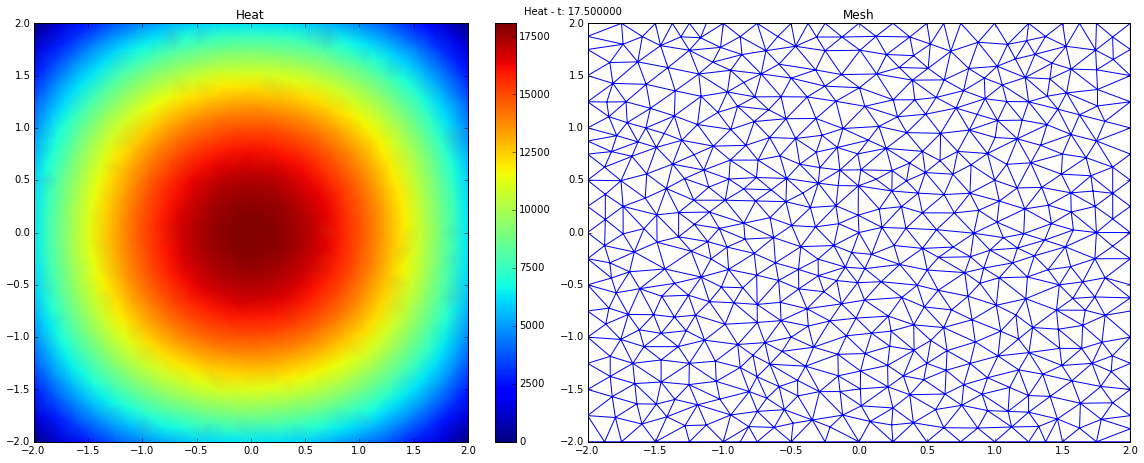

In [1]:
%matplotlib inline
%run /home/fenics/fenics-matplotlib.py
from dolfin import *; 
from mshr import *; 
from IPython.display import display, clear_output; 
import time
import logging; 
logging.getLogger('FFC').setLevel(logging.WARNING)

# Compact plot utility function
def plot_compact(u, t, stepcounter): 
    if stepcounter % 5 == 0:
        uEuclidnorm = project(u, V); ax.cla(); fig = plt.gcf(); fig.set_size_inches(16, 6.5)
        plt.subplot(1, 2, 1); mplot_function(uEuclidnorm); plt.title("Heat") # Plot norm of velocity
        if t == 0.: plt.colorbar(); plt.axis(G)
        plt.subplot(1, 2, 2);
        if t == 0.: plt.triplot(mesh2triang(mesh)); plt.title("Mesh") # Plot mesh
        plt.suptitle("Heat - t: %f" % (t)); plt.tight_layout(); clear_output(wait=True);    


######## Important code begins here ########

# Define domain and mesh
XMIN, XMAX = -2., 2.; 
YMIN, YMAX = -2., 2.; 
G = [XMIN, XMAX, YMIN, YMAX];
mresolution = 20;
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])), mresolution)

# Define finite element function space
degree = 1;
V = FunctionSpace(mesh, "CG", degree);

# Finite element functions
v = TestFunction(V); 
u = Function(V);

# Define boundary conditions
def boundary(x, on_boundary):
    return on_boundary

# Time parameters
theta = 1.0 # Implicit Euler
k = 0.5; # Time step
t, T = 0., 20.; # Start and end time

# Exact solution
k_coeff = 1
ue = Expression("exp(-(x[0]*x[0]+x[1]*x[1])/(4*a*t))/(4*pi*a*t)", a=k_coeff, t=1e-7, domain=mesh) 
u0 = ue;

bc = DirichletBC(V, ue, boundary)

# Inititalize time stepping
pl, ax = plt.subplots(); 
stepcounter = 0; 
timer0 = time.clock()

# Time-stepping loop
while t < T: 
    # Time scheme
    um = theta*u + (1.0-theta)*u0 
    
    # Weak form of the heat equation in residual form
    r = (u - u0)/k*v*dx + k_coeff*inner(grad(um), grad(v))*dx 
    
    # Solve the Heat equation (one timestep)
    solve(r==0, u, bc)  
    
    # Plot all quantities (see implementation above)
    plot_compact(u, t, stepcounter)
    
    # Shift to next timestep
    t += k; u0 = project(u, V); 
    ue.t = t;
    stepcounter += 1 
    
print "elapsed CPU time: ", (time.clock() - timer0) 

e1 = assemble((ue-u0)*(ue-u0)*dx)
e2 = assemble(ue*ue*dx)
re = sqrt(e1/e2);

print "Relative error: ", re 
